# Homework 6 - Women and children first?!

The objective of this homework is to practice simple decision trees. To successfully complete this homework, you may use any resources available to you. 

Get the `titanic3.csv` data (Source: [Link](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3info.txt)).

1. Analyze the data using pandas.
    * Create a column that specifies whether the person is a child (age <= 10)
    * Group the data by `sex`, `child`, `pclass` and interpret the survival rate.
2. Develop a decision tree with depth of 1.
    * Preprocess the `sex` column using LabelEncoder
    * Develop the decision tree
    * Visually reproduce the decision tree using a seaborn barchart.
    * Use the t-test from scipy.stats to statistically reproduce the decision.
    * Interpret the decision tree.
3. Develop a decision tree with depth of 2.
    * Develop the decision tree
    * Visually reproduce the decision tree using seaborn barcharts (left side and right side)
    * Use the ranksums test from scipy.stats to statistically reproduce the decisions.
    * Interpret the decision tree. 
    
Hints:
* Explain what you are doing.
* Use references.

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns

In [78]:
import sklearn as sk
import sklearn.tree as tree
import sklearn.preprocessing as pp
import sklearn.metrics as sm

In [79]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [80]:
%matplotlib inline

In [236]:
tc = pd.read_csv("https://raw.githubusercontent.com/mschermann/msis2802winter2018homework/master/\
titanic3.csv", )

In [216]:
pd.options.display.float_format = '{:.2f}'.format

In [217]:
tc.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

## Description of the dataset

Each row is a passenger on the Titanic. The columns report attributes for the passengers:

| Column | Description | Relevant for this homework|
|--------|-------------|--------|
|`survived`|1 = survived, 0 = died | **X**|
|`pclass`| 1 = first class, 2 = second class, 3 = third class |**X**|
|`name`| Name of the passenger| |
|`sex`| male or female|**X**|
|`age`| age in years|**X**|
|`sibsp`| The number of siblings or spouses that are also traveling on the Titanic| |
|`parch`| The number of parents or childen that are also traveling on the Titanic| |
|`ticket`|The ticket number| |
|`fare`| The ticket price | |
|`cabin`| The cabin number | |
|`embarked`| The starting city | |
|`boat`| The emergency boat number | |
|`body`| The identification number of the body | |
|`home.dest`| The destination of the passenger | |

## Women and children first?

### Create a column that specifies whether the person is a child (10 years or younger)


In [237]:
# If is a child then True, else False
tc['child'] = np.where(tc['age'] <= 10, '1', '0')
tc

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,child
0,1.00,1.00,"Allen, Miss. Elisabeth Walton",female,29.00,0.00,0.00,24160,211.34,B5,S,2,nan,"St Louis, MO",0
1,1.00,1.00,"Allison, Master. Hudson Trevor",male,0.92,1.00,2.00,113781,151.55,C22 C26,S,11,nan,"Montreal, PQ / Chesterville, ON",1
2,1.00,0.00,"Allison, Miss. Helen Loraine",female,2.00,1.00,2.00,113781,151.55,C22 C26,S,NaN,nan,"Montreal, PQ / Chesterville, ON",1
3,1.00,0.00,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1.00,2.00,113781,151.55,C22 C26,S,NaN,135.00,"Montreal, PQ / Chesterville, ON",0
4,1.00,0.00,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1.00,2.00,113781,151.55,C22 C26,S,NaN,nan,"Montreal, PQ / Chesterville, ON",0
5,1.00,1.00,"Anderson, Mr. Harry",male,48.00,0.00,0.00,19952,26.55,E12,S,3,nan,"New York, NY",0
6,1.00,1.00,"Andrews, Miss. Kornelia Theodosia",female,63.00,1.00,0.00,13502,77.96,D7,S,10,nan,"Hudson, NY",0
7,1.00,0.00,"Andrews, Mr. Thomas Jr",male,39.00,0.00,0.00,112050,0.00,A36,S,NaN,nan,"Belfast, NI",0
8,1.00,1.00,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2.00,0.00,11769,51.48,C101,S,D,nan,"Bayside, Queens, NY",0
9,1.00,0.00,"Artagaveytia, Mr. Ramon",male,71.00,0.00,0.00,PC 17609,49.50,NaN,C,NaN,22.00,"Montevideo, Uruguay",0


### Group the data by `sex`, `child`, `pclass` and interpret the survival rate.

In [219]:
tc.groupby(['sex'])['survived'].count()
f_rate = 466 / len(tc)
f_rate
m_rate = 843 / len(tc)
m_rate

sex
female    466
male      843
Name: survived, dtype: int64

0.35572519083969467

0.6435114503816793

In [220]:
tc.groupby('child')['survived'].count()
c_rate = 86 / len(tc)
c_rate

child
0    1223
1      86
Name: survived, dtype: int64

0.06564885496183206

In [221]:
tc.groupby('pclass')['survived'].count()
p1_rate = 323 / len(tc)
p1_rate
p2_rate = 277 / len(tc)
p2_rate
p3_rate = 709 / len(tc)
p3_rate

pclass
1.00    323
2.00    277
3.00    709
Name: survived, dtype: int64

0.24656488549618322

0.21145038167938932

0.5412213740458015

In [ ]:
'''
Interpret:
We can find from the ratio data above that male survival rate is nearly twice as the female, child survival rate is the low and third class has the highest ratio among all three class
'''

## Decision Tree with depth of 1

### Restrict your analysis on the relevant columns (check table above).

In [496]:
tcc = tc.copy()
# Clean data
t = tcc.dropna(subset=['survived','pclass','age','sex'])

# y should be survived value
y = t['survived']
# x should be pclass, sex and age
X = t.drop(['survived', 'name', 'sibsp', 'parch', 'ticket','fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest', 'child'], axis=1)

### Preprocess the `sex` column

In [497]:
le = pp.LabelEncoder()
X['sex'] = le.fit_transform(t['sex'].astype(str))

### Clean the dataset

In [377]:
# I cleaned before restrict on relevant columns in the first step by dropna()

### Build the decision tree

**Build** and **visualize** a decision tree with depth of 1 (i.e., one root and two leaf nodes) to find differences between passengers who survived and those who did not. 

In [483]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=1).fit(X,y)

You need to adapt the `XXX` in the following code to visualize the decision tree.

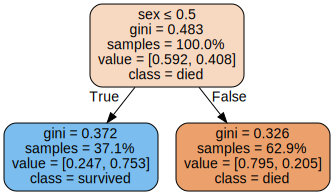

In [484]:
import graphviz
dot_data = tree.export_graphviz(dtc, out_file=None, 
                         feature_names=list(X.columns),  
                         class_names = ['survived' if i == 1 else 'died' for i in dtc.classes_] ,
                         filled=True, rounded=True,  
                         special_characters=True, 
                         proportion=True,
                        )  
graph = graphviz.Source(dot_data)  
graph 

### Visually reproduce the decision tree using a seaborn factorplot.


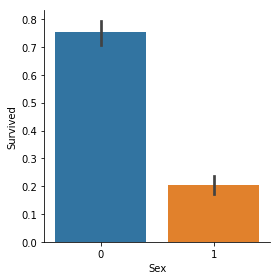

In [485]:
# TA suggests i should use bar chart to represent the distribution
g=sns.factorplot(x=X['sex'].values, y=y.values, data=t, kind="bar")
g.set_axis_labels('Sex', 'Survived')

### Use the t-test from `scipy.stats` to statistically reproduce the decision.

In [486]:
from scipy.stats import ttest_ind

# Slice the data for left side with sex<=0.5
a = tcc.iloc[X[X['sex']<=0.5].index.values]['survived']
# Slice the data for left side with sex>0.5
b = tcc.iloc[X[X['sex']>0.5].index.values]['survived']

scipy.stats.ttest_ind(a,b)

Ttest_indResult(statistic=20.622130510238705, pvalue=1.566605331038222e-79)

## Develop a decision tree with depth of 2

<b>Build</b> and <b>show</b> a decision tree of <b>depth = 2</b> to find the differences between those who survived and those who didn't. Your tree should have four leaves.

In [487]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=2).fit(X,y)

You need to adapt the `XXX` in the following code to visualize the decision tree.

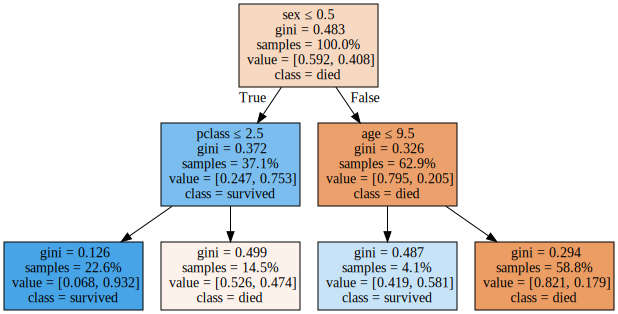

In [488]:
dot_data = tree.export_graphviz(dtc, out_file=None, 
                         feature_names=list(X.columns),  
                         class_names = ['survived' if i == 1 else 'died' for i in dtc.classes_] ,
                         filled=True, 
                         special_characters=True,
                               proportion=True)  
graph = graphviz.Source(dot_data)  
graph 

###  Visually reproduce the left side of the decision tree using seaborn barcharts

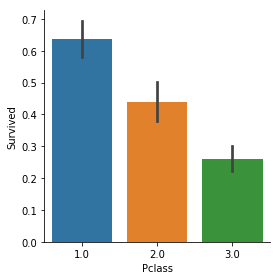

In [489]:
h=sns.factorplot(x=X['pclass'].values, y=y.values, data=t, kind="bar")
h.set_axis_labels('Pclass', 'Survived')

### Use the ranksums test from scipy.stats to statistically reproduce the decision on the left side.


In [493]:
import scipy
from scipy.stats import f_oneway, ranksums

# Slice the first layer
a = tcc.iloc[X[X['sex']<=0.5].index.values]

# Slice the second layer
x = a[a['pclass']<=2.5]['survived']
y = a[a['pclass']>2.5]['survived']

r1 = scipy.stats.ranksums(x, y)
r2 = scipy.stats.f_oneway(x, y)

r1
r2

RanksumsResult(statistic=7.6264271930953198, pvalue=2.4134913208883318e-14)

F_onewayResult(statistic=142.07252159375869, pvalue=4.1875293480157111e-28)

###  Visually reproduce the right side of the decision tree using seaborn barcharts

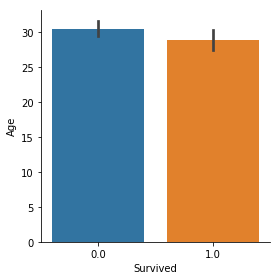

In [499]:
i=sns.factorplot(y= X['age'].values, x= y.values, data=t, kind="bar")
i.set_axis_labels('Survived', 'Age')

### Use the ranksums test from scipy.stats to statistically reproduce the decisions on the right side.


In [495]:
import scipy
from scipy.stats import f_oneway, ranksums

# Slice the first layer
a1 = tcc.iloc[X[X['sex']>0.5].index.values]

# Slice the second layer
x1 = a[a['age']<=9.5]['survived']
y1 = a[a['age']>9.5]['survived']

r3 = scipy.stats.ranksums(x1, y1)
r4 = scipy.stats.f_oneway(x1, y1)

r3
r4

RanksumsResult(statistic=-1.2706128758992283, pvalue=0.20386640400168665)

F_onewayResult(statistic=2.9043137200556282, pvalue=0.089147590814552494)